In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from llama_index.core import PromptTemplate

world_model_examples = """
Objective:  What's the name of our Lead Developer ?
Previous instructions: [NONE]
Last engine: [NONE]
Current relevant state: 
- screenshot: [SCREENSHOT]

Thoughts:
- The screenshot shows a Notion page.
- The "Our Departments" section lists various departments, including "Engineering Department."
- To find the name of the Lead Developer, I should look for information under the "Engineering Department" section.
- The "Engineering Department" section is likely to contain details about the team, including the Lead Developer.
Next engine: Navigation Engine
Instruction: Locate the link titled "Engineering Department" and click on it.
-----
Objective:  Go to the first issue you can find
Previous instructions: 
- Click on 'Issues' with the number '28' next to it.
Last engine: Navigation Engine
Current relevant state: 
- screenshot: [SCREENSHOT]

Thoughts:
- The current screenshot shows the issues page of the repository 'lavague-ai/LaVague'.
- The objective is to go to the first issue.
- The first issue is highlighted in the list of issues.
Next engine: Navigation Engine
Instruction: Click on the issue, with title 'Build and share place where people can suggest their use cases and results #225'
-----
Objective: Find When Llama 3 was released
Previous instructions:
- Click on 'meta-llama/Meta-Llama-3-8B'
Last engine: Navigation Engine
Current relevant state: 
- screenshot: [SCREENSHOT]

Thoughts:
- The current screenshot shows the model page for 'meta-llama/Meta-Llama-3-8B' on Hugging Face.
- Hugging Face, is a hub for AI models and datasets, where users can explore and interact with a variety of AI models.
- I am therefore on the right page to find information about the release date of 'Meta-Llama-3-8B'.
- To find the release date, I need to locate the relevant information in the content of the page.
- Therefore the best next step is to use the Python Engine to extract the release date from the content of the page.
Next engine: Python Engine
Instruction: Extract the release date of 'Meta-Llama-3-8B' from the textual content of the page.
-----
Objective: Provide the code to get started with Gemini API
Previous instructions:
- Click on 'Read API docs'
- Click on 'Gemini API quickstart' on the menu
Last engine: Navigation Engine
Current relevant state:
- screenshot: [SCREENSHOT]

Thoughts:
- The current screenshot shows the documentation page for the getting started of Gemini API.
- I am therefore on the right page to find the code to get started with the Gemini API.
- The next step is to provide the code to get started with the Gemini API.
- Therefore I need to use the Python Engine to generate the code to extract the code to get started with the Gemini API from this page.
Next engine: Python Engine
Instruction: Extract the code to get started with the Gemini API from the content of the page.
-----
Objective: Show what is the cheapest product
Previous instructions: [NONE]
Last engine: [NONE]
Current relevant state:
- screenshot: [SCREENSHOT]

Thoughts:
- The screenshot shows an e-commerce website with various products.
- To find the cheapest product, I need to identify the product with the lowest price.
- There seems to be selectors for sorting products by price on the left side of the page.
- The screenshot only shows part of the selectors for price. I should scroll down to see the full list of products and prices.
Next engine: Navigation Controls
Instruction: SCROLL_DOWN
-----
Objective: What tech stack do we use?
Previous instructions: 
- Locate and click on the "Technology Solutions" link or section to find information about the tech stack.
- Click on the "Technology Solutions" section to explore detailed information about the tech stack.
- Click on the "Technology Solutions" section under "Our Services."
Last engine: Navigation Engine
Current relevant state: 
- screenshot: [SCREENSHOT]

Thought:
- The screenshot shows a Notion webpage with information about a company called ACME INC.
- It has information about the company, their services, and departments.
- Previous instructions tried to click on "Technology Solutions" without success. This probably means that "Technology Solutions" is not clickable or reachable.
- Other strategies have to be pursued to reach the objective.
- There seems to be information at the end of the screen about departments, with mention of a 'Software development' section that could be promising.
- The best next step is to scroll down to gather more information.
Next engine: Navigation Controls
Instruction: SCROLL_DOWN 
-----
Objective: Who is in the Software Quality Assurance team?
Previous instructions: 

- Click on the "Software Development" section under "Our Departments."
- Click on the "Quality Assurance Team" link to view detailed information about the team members.
- Click on the "Quality Assurance Team" link to view detailed information about the team members.
Last engine: Navigation Engine
Current relevant state: 
- screenshot: [SCREENSHOT]

Thought:
- The screenshot shows a Notion webpage with information about different teams.
- The objective is to find information about the Software Quality Assurance team.
- The previous instructions tried to click on the "Quality Assurance Team" link without success. This probably means that the link is not clickable or reachable.
- By looking closely at the screenshot, there seems to be ambiguity because two titles have "Quality Assurance Team" in them.
- However, the second one has a full title "Quality Assurance Team Information" which is more likely to contain the information I am looking for.
- The best next step is to click on the "Quality Assurance Team Information" link.
Next engine: Navigation Engine
Instruction: Click on the "Quality Assurance Team Information" link.
"""

WORLD_MODEL_PROMPT_TEMPLATE = PromptTemplate("""
You are an AI system specialized in high level reasoning. Your goal is to generate instructions for other specialized AIs to perform web actions to reach objectives given by humans.
Your inputs are:
- objective ('str'): a high level description of the goal to achieve.
- previous_instructions ('str'): a list of previous steps taken to reach the objective.
- last_engine ('str'): the engine used in the previous step.
- current_relevant_state ('obj'): the state of the environment to use to perform the next step. This can be a screenshot if the previous engine was a NavigationEngine, or description of variables if the previous engine was a PythonEngine.

Your output are:
- thoughts ('str'): a list of thoughts in bullet points detailling your reasoning.
- next_engine ('str'): the engine to use for the next step.
- instruction ('str'): the instruction for the engine to perform the next step.

Here are the engines at your disposal:
- Python Engine: This engine is used when the task requires doing computing using the current state of the agent. 
It does not impact the outside world and does not navigate.
- Navigation Engine: This engine is used when the next step of the task requires further navigation to reach the goal. 
For instance it can be used to click on a link or to fill a form on a webpage. This engine is heavy and will do complex processing of the current HTML to decide which element to interact with.
- Navigation Controls: This is a simpler engine to do commands that does not require reasoning, which are 'SCROLL_DOWN', 'SCROLL_UP' and 'WAIT'.

The instruction should be detailled as possible and only contain the next step. 
When providing an instruction to the Python Engine, do not provide any guideline on using visual information such as the screenshot, as the Python Engine does not have access to it.
If the screenshot provides information but seems insufficient, use navigation controls to further explore the page.
When providing information for the Navigation Engine, focus on elements that are most likely interactable, such as buttons, links, or forms. 
Be precise in your description of the element to avoid ambiguity, otherwise the Navigation Engine may not be able to select the right element to perform the desired action.
If the objective is already achieved in the screenshot, provide the next engine and instruction 'STOP'.

Here are previous examples:
{examples}

Here is the next objective:
Objective: {objective}
Previous instructions: 
{previous_instructions}
Last engine: {last_engine}
Current relevant state: {current_state}

Thought:
"""
)


In [3]:
from lavague.contexts.openai import OpenaiContext
openai_context = OpenaiContext(llm="gpt-4o")

from lavague.contexts.gemini import GeminiContext
context = GeminiContext()
context.mm_llm = openai_context.mm_llm

mm_llm = context.mm_llm
prompt_template = WORLD_MODEL_PROMPT_TEMPLATE.partial_format(
    examples=world_model_examples
)

/home/dhuynh/miniconda3/envs/myenv/lib/python3.10/site-packages/lavague/core/__init__.py:18: UserWarning: Telemetry is turned on. To turn off telemetry, set your TELEMETRY_VAR to 'NONE'
  warnings.warn(warning_message, UserWarning)
/home/dhuynh/miniconda3/envs/myenv/lib/python3.10/site-packages/lavague/core/__init__.py:24: UserWarning: Security warning: This package executes LLM-generated code. Consider using this package in a sandboxed environment.
  warnings.warn(warning_message, UserWarning)


In [4]:

from lavague.core import Context, get_default_context
from typing import Optional

REWRITER_PROMPT_TEMPLATE = PromptTemplate("""
You are an AI expert.
You are given a high level instruction on a generic action to perform.
Your output is an instruction of the action, rewritten to be more specific on the capabilities at your disposal to perform the action.
Here are your capabilities:
{capabilities}

Here are previous examples:
{examples}

Here is the next instruction to rewrite:
Original instruction: {original_instruction}
""")

DEFAULT_CAPABILITIES = """
- Answer questions using the content of an HTML page using llama index and trafilatura
"""

DEFAULT_EXAMPLES = """
Original instruction: Use the content of the HTML page to answer the question 'How was falcon-11B trained?'
Capability: Answer questions using the content of an HTML page using llama index and trafilatura
Rewritten instruction: Extract the content of the HTML page and use llama index to answer the question 'How was falcon-11B trained?'
"""

class Rewriter:
    def __init__(self, capabilities: str = DEFAULT_CAPABILITIES, examples: str = DEFAULT_EXAMPLES, context: Optional[Context] = None):
        if context is None:
            context = get_default_context()
        self.llm = context.llm
        self.prompt_template = REWRITER_PROMPT_TEMPLATE.partial_format(
            capabilities=capabilities,
            examples=examples
        )      
    def rewrite_instruction(self, original_instruction: str) -> str:
        prompt = self.prompt_template.format(original_instruction=original_instruction)
        rewritten_instruction = self.llm.complete(prompt).text
        return rewritten_instruction

In [5]:

from lavague.core import Context, get_default_context
from llama_index.core.base.llms.base import BaseLLM
import copy

PYTHON_ENGINE_PROMPT_TEMPLATE = PromptTemplate("""
You are an AI system specialized in Python code generation to answer user queries.
The inputs are: an instruction, and the current state of the local variables available to the environment where your code will be executed.
Your output is the code that will perform the action described in the instruction, using the variables available in the environment.
You can import libraries and use any variables available in the environment.
Detail thoroughly the steps to perform the action in the code you generate with comments.
The last line of your code should be an assignment to the variable 'output' containing the result of the action.

Here are previous examples:
{examples}

Instruction: {instruction}
State:
{state_description}
Code:
""")

class PythonEngine:
    llm: BaseLLM    
    prompt_template: PromptTemplate
    rewriter: Rewriter

    def __init__(self, examples: str, context: Optional[Context] = None):
        if context is None:
            context = get_default_context()
        self.llm = context.llm
        self.extractor = context.extractor
        self.prompt_template = PYTHON_ENGINE_PROMPT_TEMPLATE.partial_format(
            examples=examples
        )
        self.rewriter = Rewriter(context=context)
        
    def generate_code(self, instruction: str, state: dict) -> str:
        rewriter = self.rewriter
        rewritten_instruction = rewriter.rewrite_instruction(instruction)
        
        state_description = self.get_state_description(state)
        prompt = self.prompt_template.format(instruction=rewritten_instruction, state_description=state_description)
        response = self.llm.complete(prompt).text
        code = self.extractor.extract(response)
        return code
    
    def execute_code(self, code: str, state: dict):
        local_scope = copy.deepcopy(state)
        exec(code, local_scope, local_scope)
        output = local_scope["output"]
        return output
        
    def get_state_description(self, state: dict) -> str:
        """TO DO: provide more complex state descriptions"""
        state_description = """
    html ('str'): The content of the HTML page being analyzed"""
        return state_description
    
with open("python_engine_examples.txt") as f:
    python_engine_examples = f.read()
    
python_engine = PythonEngine(python_engine_examples, context)

In [6]:
# Flemme de finir

# Thoughts:
# - The current page is the Azure Pricing Calculator.
# - To calculate the cost of an AKS (Azure Kubernetes Service) cluster, we need to add the AKS service to the calculator.
# - The current screen does not show the options to add services.
# - The best approach is to scroll down to find the section where services can be added to the calculator.
# - Because this is a simple scrolling action, the best next step is to use the Navigation Controls engine to scroll down.
# Next engine: Navigation Controls
# Instruction: Scroll down by one full screen to continue exploring the current page.
# -----
# Objective: Find the definition of 'Diffusers'
# Previous instructions: 
# - Click on 'Diffusers' link
# Last engine: Navigation Engine
# Current state: [SCREENSHOT]

# Thought:
# - The current page is the documentation page of Hugging Face.
# - Hugging Face is a platform for AI models and datasets, where users can explore and interact with latest AI resources.
# - The definition of 'Diffusers' is provided in the documentation.
# - No further action is needed to achieve the objective.
# Next engine: STOP
# Instruction: STOP -->

In [7]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys

chrome_options = Options()
chrome_options.add_argument("--no-sandbox")
driver = webdriver.Chrome(options=chrome_options)

width = 1024
height = 1024

driver.set_window_size(width, height)
viewport_height = driver.execute_script("return window.innerHeight;")

height_difference = height - viewport_height
driver.set_window_size(width, height + height_difference)

driver.get("https://huggingface.co/meta-llama/Meta-Llama-3-8B")

In [8]:
import re

def extract_instruction(text):
    # Use a regular expression to find the content after "Instruction:"
    instruction_patterns = [
        r"Instruction:\s*(.*)",
        r"### Instruction:\s*(.*)"
    ]
    for pattern in instruction_patterns:
        instruction_match = re.search(pattern, text)
        if instruction_match:
            return instruction_match.group(
                1
            ).strip()  # Return the matched group, stripping any excess whitespace
        
    raise ValueError("No instruction found in the text.")

def extract_next_engine(text):
    # Use a regular expression to find the content after "Next engine:"
    
    next_engine_patterns = [
        r"Next engine:\s*(.*)",
        r"### Next Engine:\s*(.*)"
    ]
    
    for pattern in next_engine_patterns:
        next_engine_match = re.search(pattern, text)
        if next_engine_match:
            return next_engine_match.group(
                1
            ).strip()
    raise ValueError("No next engine found in the text.")

In [9]:
from lavague.core import ActionEngine
from lavague.drivers.selenium import SeleniumDriver

selenium_driver = SeleniumDriver()
selenium_driver.driver = driver
navigation_engine = ActionEngine(selenium_driver)
action_engine = navigation_engine

In [24]:
viewport_height = driver.execute_script("return window.innerHeight")

def scroll_down_one_viewport():
    body = driver.find_element(By.TAG_NAME, "body")
    num_scrolls = viewport_height // 50  # Assuming each arrow key press scrolls 50 pixels
    for _ in range(num_scrolls):
        body.send_keys(Keys.ARROW_DOWN)
        time.sleep(0.1)  # 
        
scroll_down_one_viewport()

In [30]:
def test():
    initial_scroll_position = driver.execute_script("return window.scrollY")

    body = driver.find_element(By.TAG_NAME, "body")
    body.send_keys(Keys.ARROW_DOWN)

    # Wait a bit to ensure the scroll action is completed
    time.sleep(1)

    # Get the new scroll position
    new_scroll_position = driver.execute_script("return window.scrollY")

    # Calculate the difference to find out how much one arrow key press scrolls
    scroll_amount = new_scroll_position - initial_scroll_position

    print(f"One arrow key press scrolls {scroll_amount} pixels")
test()

One arrow key press scrolls 0 pixels


In [41]:
import time
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By

# TO DO: Generalize to BaseDriver to support other drivers

def scroll_down_one_viewport(driver):
    viewport_height = driver.execute_script("return window.innerHeight")

    body = driver.find_element(By.TAG_NAME, "body")
    num_scrolls = viewport_height // 50  # Assuming each arrow key press scrolls 50 pixels
    for _ in range(num_scrolls):
        body.send_keys(Keys.ARROW_DOWN)
        time.sleep(0.05)  
        
def scroll_up_one_viewport(driver):
    viewport_height = driver.execute_script("return window.innerHeight")

    body = driver.find_element(By.TAG_NAME, "body")
    num_scrolls = viewport_height // 50  # Assuming each arrow key press scrolls 50 pixels
    for _ in range(num_scrolls):
        body.send_keys(Keys.ARROW_UP)
        time.sleep(0.05)
    
class NavigationControl:
    def __init__(self, driver) -> None:
        self.driver = driver
        
    def execute_instruction(self, instruction):
        if 'SCROLL_DOWN' in instruction:
            driver = self.driver
            scroll_down_one_viewport(driver)
        elif 'SCROLL_UP' in instruction:
            driver = self.driver
            scroll_up_one_viewport(driver)
        elif 'WAIT' in instruction:
            time.sleep(2)
        else:
            raise ValueError(f"Unknown instruction: {instruction}")
        
navigation_control = NavigationControl(driver)

In [45]:
navigation_control.execute_instruction("SCROLL_UP")

In [12]:
from typing import Optional
from llama_index.core import PromptTemplate, SimpleDirectoryReader
from llama_index.core.multi_modal_llms import MultiModalLLM

from lavague.core import Context, get_default_context

class WorldModel:
    """Abstract class for WorldModel"""

    mm_llm: MultiModalLLM
    prompt_template: PromptTemplate

    def __init__(self, examples: str, context: Optional[Context] = None):
        if context is None:
            context = get_default_context()
        self.mm_llm = context.mm_llm
        self.prompt_template = WORLD_MODEL_PROMPT_TEMPLATE.partial_format(
            examples=examples
        )
        
    def get_instruction(self, objective: str, previous_instructions, last_engine, current_state, image_documents) -> str:
        """Use GPT*V to generate instruction from the current state and objective."""
        mm_llm = self.mm_llm
        
        prompt = prompt_template.format(
            objective=objective, previous_instructions=previous_instructions, 
            last_engine=last_engine, current_state=current_state)
        
        mm_llm_output = mm_llm.complete(prompt, image_documents=image_documents).text

        next_engine = extract_next_engine(mm_llm_output)
        instruction = extract_instruction(mm_llm_output)
        return instruction, next_engine

In [13]:

from lavague.core.utilities.format_utils import extract_instruction
from lavague.core import ActionEngine
from selenium.webdriver.remote.webdriver import WebDriver
from llama_index.core import SimpleDirectoryReader

N_ATTEMPTS = 5
N_STEPS = 5

class WebAgent:
    """
    Web agent class, for now only works with selenium.
    """
    def __init__(self, action_engine: ActionEngine, python_engine: PythonEngine, world_model: WorldModel):
        driver = action_engine.driver
        
        self.driver: SeleniumDriver = driver
        self.action_engine: ActionEngine = action_engine
        self.world_model: WorldModel = world_model
        self.navigation_control = NavigationControl(driver)
        self.python_engine = python_engine
        
        # Variable to store the output of the agent
        self.output = None

    def get(self, url):
        self.driver.goto(url)
        
    def run(self, objective: str, display_in_notebook: bool = False):
        world_model = self.world_model
        action_engine = self.action_engine
        driver: WebDriver = self.driver.driver
        
        previous_instructions = "[NONE]"
        last_engine = "[NONE]"
        
        current_state = f"""
- screenshot: [SCREENSHOT]
"""

        # TO DO: Don't save on disk the screenshot but do it in memory
        driver.save_screenshot("screenshots/output.png")
        image_documents = SimpleDirectoryReader("./screenshots").load_data()
        
        for i in range(N_STEPS):
            
            next_engine, instruction = world_model.get_instruction(
                objective, previous_instructions, last_engine, 
                current_state, image_documents)
            
            print(f"Next Engine: {next_engine}")
            print(f"Instruction: {instruction}")
            
            if next_engine == "Navigation Engine":
                
                query = instruction
                nodes = action_engine.get_nodes(query)
                llm_context = "\n".join(nodes)

                for _ in range(N_ATTEMPTS):
                    try:
                        action = action_engine.get_action_from_context(llm_context, query)
                        code = f"""
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
                        {action}""".strip()

                        local_scope = {"driver": driver}
                        exec(code, local_scope, local_scope)
                        break
                    except Exception as e:
                        print(f"Action execution failed. Retrying...")
                        pass
                    
                driver.save_screenshot("screenshots/output.png")
                image_documents = SimpleDirectoryReader("./screenshots").load_data()

                current_state = f"""
- screenshot: [SCREENSHOT]
                """
                    
            elif next_engine == "Python Engine":

                state = {
                    "html": driver.page_source
                }

                code = python_engine.generate_code(instruction, state)
                output = python_engine.execute_code(code, state)
                print("Output generated by Python Engine: ", output)
                print("Code generated by Python Engine: ", code)
                
                current_state = f"""
- output: {output}"""
                self.output = output
            elif next_engine == "Navigation Controls":
                navigation_control.execute_instruction(instruction)
                driver.save_screenshot("screenshots/output.png")
                image_documents = SimpleDirectoryReader("./screenshots").load_data()
                
            elif next_engine == "STOP" or instruction == "STOP":
                print("Objective reached. Stopping...")
                return self.output
            
            if previous_instructions == "[NONE]":
                previous_instructions = f"""
- {instruction}"""
            else:
                previous_instructions += f"""
- {instruction}"""
                
            last_engine = next_engine


In [14]:
# world_model = WorldModel(world_model_examples, context)
# agent = WebAgent(action_engine, python_engine, world_model)

# url = "https://maize-paddleboat-93e.notion.site/Welcome-to-ACME-INC-0ac66cd290e3453b93a993e1a3ed272f"
# objective = "What tech stack do we use?"

# agent.get(url)
# output = agent.run(objective)
# print(output)

In [22]:
from llama_index.core import SimpleDirectoryReader

N_ATTEMPTS = 5
N_STEPS = 13

# url = "https://maize-paddleboat-93e.notion.site/Welcome-to-ACME-INC-0ac66cd290e3453b93a993e1a3ed272f"
# objective = "What's the name of our Lead Software Dev?"

url = "https://maize-paddleboat-93e.notion.site/Welcome-to-ACME-INC-0ac66cd290e3453b93a993e1a3ed272f"
objective = "Who is in the Software Quality Assurance team?"

# url = "https://huggingface.co"
# objective = "Provide the code to use Falcon 11B"

# url = "https://huggingface.co/docs"
# objective = "Provide the code to install PEFT"

driver.get(url)

previous_instructions = "[NONE]"
last_engine = "[NONE]"

driver.save_screenshot("screenshots/output.png")
image_documents = SimpleDirectoryReader("./screenshots").load_data()

current_state = f"""
- screenshot: [SCREENSHOT]
"""

for i in range(N_STEPS):
    prompt = prompt_template.format(
        objective=objective, previous_instructions=previous_instructions, 
        last_engine=last_engine, current_state=current_state)

    mm_llm_output = mm_llm.complete(prompt, image_documents=image_documents).text

    print(mm_llm_output)

    next_engine = extract_next_engine(mm_llm_output)
    instruction = extract_instruction(mm_llm_output)
    
    if "Navigation Engine" in next_engine:
        
        query = instruction
        nodes = action_engine.get_nodes(query)
        llm_context = "\n".join(nodes)

        for _ in range(N_ATTEMPTS):
            try:
                action = action_engine.get_action_from_context(llm_context, query)
                code = f"""
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
                {action}""".strip()

                local_scope = {"driver": driver}
                exec(code, local_scope, local_scope)
                break
            except Exception as e:
                print(f"Action execution failed. Retrying...")
                pass
            
        driver.save_screenshot("screenshots/output.png")
        image_documents = SimpleDirectoryReader("./screenshots").load_data()

        current_state = f"""
- screenshot: [SCREENSHOT]
        """
            
    elif "Python Engine" in next_engine:
        state = {
            "html": driver.page_source
        }

        code = python_engine.generate_code(instruction, state)
        output = python_engine.execute_code(code, state)
        print("Output generated by Python Engine: ", output)
        print("Code generated by Python Engine: ", code)
        
        current_state = f"""
- output: {output}
"""
    elif "Navigation Controls" in next_engine:
        navigation_control.execute_instruction(instruction)
        driver.save_screenshot("screenshots/output.png")
        image_documents = SimpleDirectoryReader("./screenshots").load_data()
        
    # elif next_engine == "IO Engine":
    #     print("IO Engine")
    #     break
    elif next_engine == "STOP" or instruction == "STOP":
        print("Objective reached. Stopping...")
        break
    #     print("IO Engine")
    #     break
    
    if previous_instructions == "[NONE]":
        previous_instructions = f"""
- {instruction}"""
    else:
        previous_instructions += f"""
- {instruction}"""
        
    last_engine = next_engine


- The screenshot shows a Notion webpage with information about ACME INC.
- The page includes sections such as "About Us," "Our Services," "Our Departments," and "Contact Us."
- The "Our Departments" section lists various departments, including "Software Development."
- To find information about the Software Quality Assurance team, I should explore the "Software Development" section.
- The best next step is to click on the "Software Development" section.

Next engine: Navigation Engine
Instruction: Click on the "Software Development" section under "Our Departments."
- The screenshot shows a Notion webpage with the title "Software Development."
- The page appears to be loading or has not fully rendered yet.
- The objective is to find information about the Software Quality Assurance team.
- Since the page is not fully loaded, the best next step is to wait for the page to load completely.

Next engine: Navigation Controls
Instruction: WAIT
Thoughts:
- The screenshot shows the "Software Dev

KeyboardInterrupt: 

In [23]:
navigation_control.execute_instruction("SCROLL_DOWN")

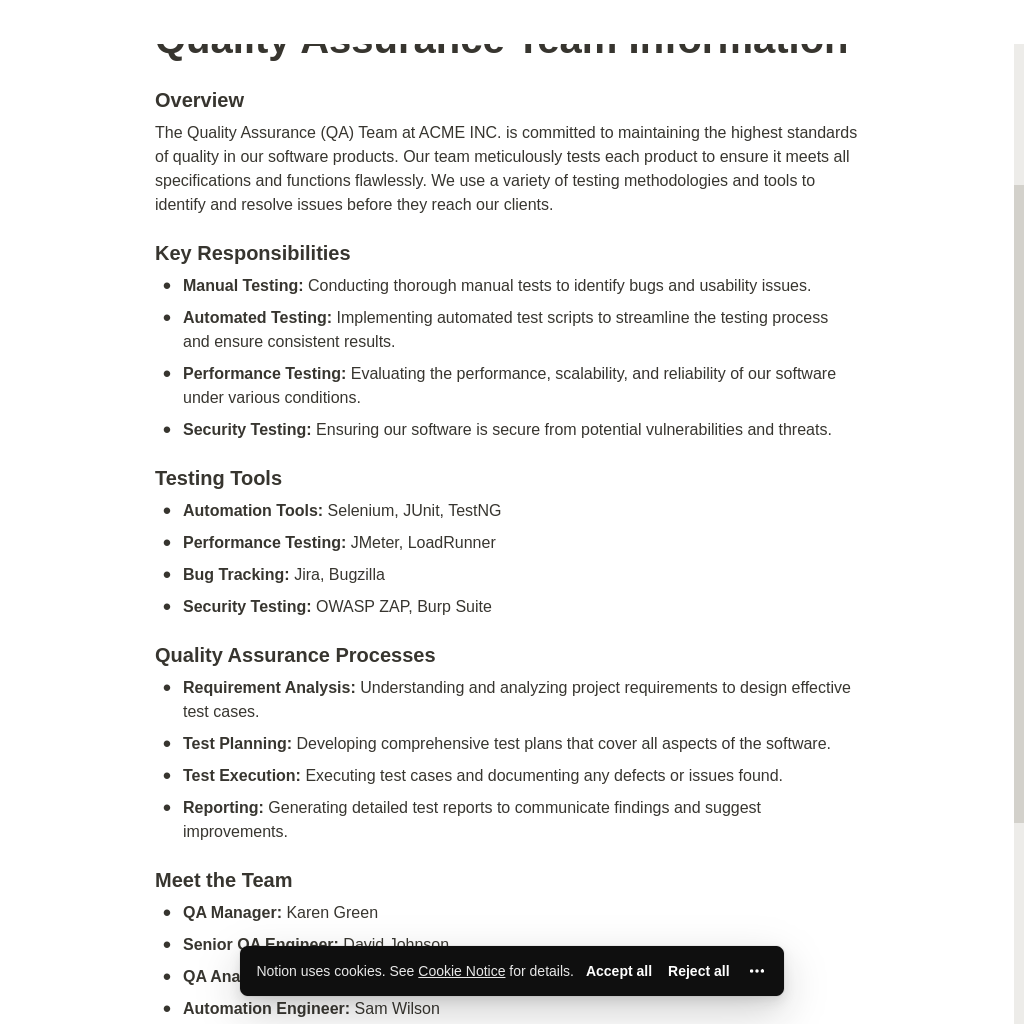

In [20]:
driver.save_screenshot("screenshot.png")

from IPython.display import Image, display
display(Image(filename='screenshot.png'))

In [18]:
viewport_height = driver.execute_script("return window.innerHeight")

# Get the height of the entire page
total_height = driver.execute_script("return document.body.scrollHeight")

# Calculate the number of scrolls needed to cover one screen size
body = driver.find_element(By.TAG_NAME, "body")

# Scroll down by viewport height
num_scrolls = viewport_height // 50  # 50 pixels per arrow down key press (you may need to adjust this)

for _ in range(num_scrolls):
    body.send_keys(Keys.ARROW_DOWN)


In [19]:
from selenium.webdriver.common.action_chains import ActionChains

actions = ActionChains(driver)

element_to_hover_over = link_to_click = driver.find_element(By.XPATH, """//*[contains(text(),"Quality Assurance Team")]""")

# Move to the element and perform the hover action
actions.move_to_element(element_to_hover_over).double_click().perform()


JavascriptException: Message: javascript error: {"status":60,"value":"[object HTMLTitleElement] has no size and location"}
  (Session info: chrome=123.0.6312.4)
Stacktrace:
#0 0x55bb7f4d7863 <unknown>
#1 0x55bb7f1cd8c6 <unknown>
#2 0x55bb7f1d2e75 <unknown>
#3 0x55bb7f1d4bce <unknown>
#4 0x55bb7f1d4c5c <unknown>
#5 0x55bb7f21e78d <unknown>
#6 0x55bb7f21db76 <unknown>
#7 0x55bb7f26145d <unknown>
#8 0x55bb7f23a5a2 <unknown>
#9 0x55bb7f258c19 <unknown>
#10 0x55bb7f23a343 <unknown>
#11 0x55bb7f20b593 <unknown>
#12 0x55bb7f20bf5e <unknown>
#13 0x55bb7f49b84b <unknown>
#14 0x55bb7f49f7a5 <unknown>
#15 0x55bb7f489571 <unknown>
#16 0x55bb7f4a0332 <unknown>
#17 0x55bb7f46e87f <unknown>
#18 0x55bb7f4c6728 <unknown>
#19 0x55bb7f4c68fb <unknown>
#20 0x55bb7f4d69b4 <unknown>
#21 0x7fe65c18d609 start_thread


In [ ]:
actions = ActionChains(driver)

# Scroll down by sending PAGE_DOWN key
actions.send_keys(Keys.PAGE_DOWN).perform()


In [ ]:
print(action)

# Let's proceed step by step.
# First we need to identify the link, then we can click on it.

# Based on the HTML provided, the link can be uniquely identified using the text "Quality Assurance Team"
# Let's use this text with Selenium to identify the link
link_to_click = driver.find_element(By.XPATH, """//*[contains(text(),"Quality Assurance Team")]""")

# Then we can click on the link
link_to_click.click()


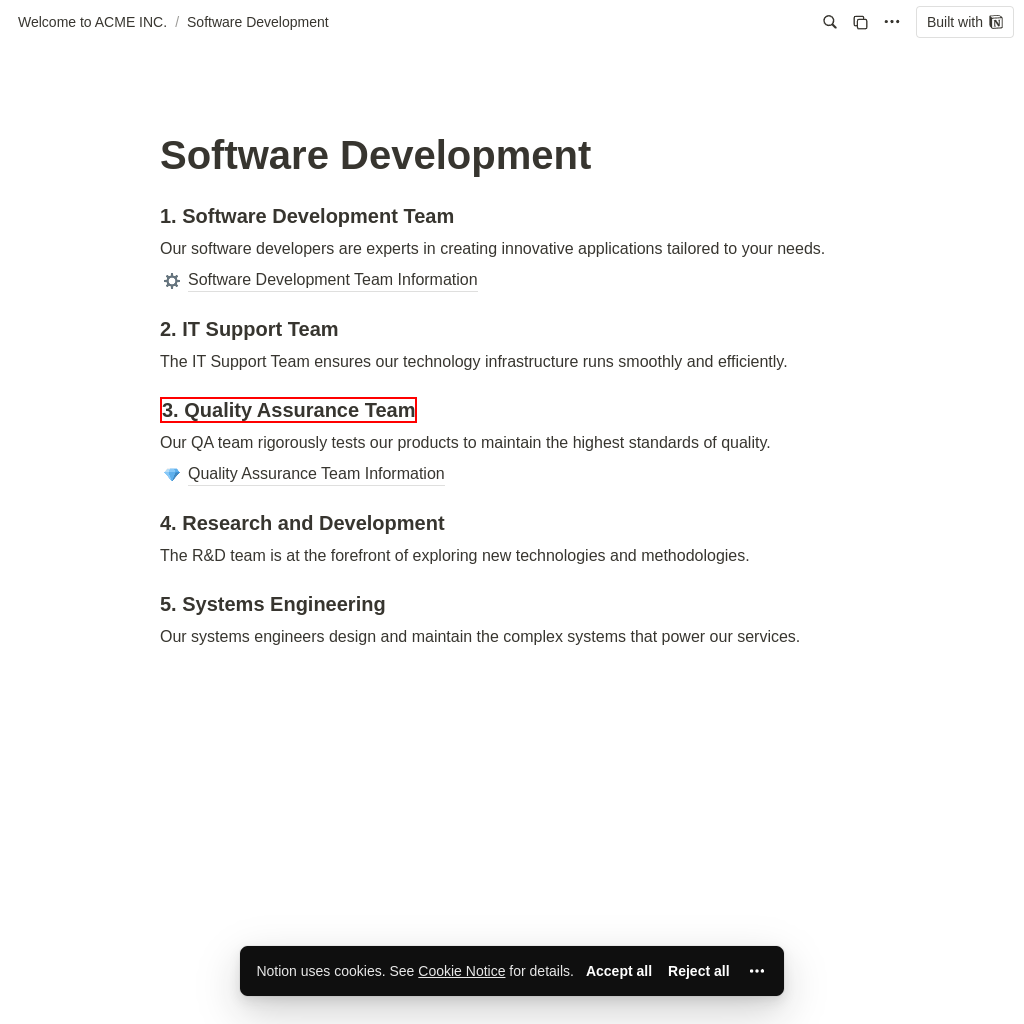

In [ ]:
outputs = selenium_driver.get_highlighted_element(action)
image = outputs[-1]["image"]
bounding_box = outputs[-1]["bounding_box"]
viewport_size = outputs[-1]["viewport_size"]

from lavague.core.utilities.web_utils import display_screenshot
display_screenshot(image)

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

try:
    # Define a WebDriverWait instance
    wait = WebDriverWait(driver, 3)
    
    # Define the locator for the element
    element_locator = (By.XPATH, """//*[contains(text(),"Technology Solutions:")]""")
    
    # Wait until the element is visible and enabled (clickable)
    element = wait.until(EC.element_to_be_clickable(element_locator))
    
    print("Element is clickable")
    
except TimeoutException:
    print("Element is not clickable")


NameError: name 'TimeoutException' is not defined

In [ ]:
import re

# Sample text
text = """
### Next Engine:
Navigation Engine

### Instruction:
Locate and click on the "PEFT" link to navigate to its documentation or installation guide.
"""

# Define the patterns to extract the required parts


# Print the results
print("Navigation Engine:", navigation_engine)
print("Instruction:", instruction)


Navigation Engine: <lavague.core.action_engine.ActionEngine object at 0x7f68e28a5ab0>
Instruction: SCROLL_DOWN


In [ ]:
html = driver.page_source
page_content_summary = page_summarizer.summarize(html)


In [ ]:
print(output)

NameError: name 'output' is not defined